# SBU CSE 352 - HW 4 - Machine Learning From Scratch


All student names in group: Safwan Kader, Jerry Xiao, Dylan Lai

I understand that my submission needs to be my own group's work: SK, JX, DL

I understand that ChatGPT / Copilot / other AI tools are not allowed: SK, JX, DL

---

## Instructions

Total Points: 100

1. Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy and built-in packages like random). Submit the completely rendered notebook as a HTML file.

  **Important:** Do not use scikit-learn or other packages with ML built in. The point of this is to be a learning exercise. Using linear algebra from numpy is okay (things like matrix operations or pseudoinverse, for example, but not lstsq).

2. Your notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use matplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
3. Document your code. Add a short discussion of how your implementation works and your design choices.

## Introduction

You will implement several machine learning algorithms and evaluate their accuracy. This will be done for a downscaled version of the MNIST digit recognition dataset.

**Like in real life, some of the tasks you will be asked to do may not be possible, at least directly. In these cases, your job is to figure out why it won't work and either propose a fix (best), or provide a clear explanation why it won't work.**

For example, if the problem says to do k-nearest neighbors with a dataset of a billion points, this could require too much time to do each classification so it's infeasible to evaluate its test accuracy. In this case, you could suggest randomly downsample the data to a more manageable size, which will speed things up by may lose some accuracy. In your answer, then, you should describe the problem and how you solved it and the trade-offs.

# Data
First the code below ensures you have access to the training data (a subset of the MNIST images), consisting of 100 handwritten images of each digit.

In [4]:
# First download the repo and change the directory to be the one where the dependencies are.
# You should only need to do this once per session. If you want to reset, do Runtime -> Disconnect and Delete Runtime
# You can always do !pwd to see the current working directory and !ls to list current files.
!git clone https://github.com/stanleybak/CS7320-AI.git
%cd CS7320-AI/ML
!ls

Cloning into 'CS7320-AI'...
remote: Enumerating objects: 2738, done.
remote: Counting objects: 100% (855/855), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 2738 (delta 522), reused 796 (delta 478), pack-reused 1883
Receiving objects: 100% (2738/2738), 285.30 MiB | 32.12 MiB/s, done.
Resolving deltas: 100% (1690/1690), done.
/content/CS7320-AI/ML
line_fitting.ipynb	ML_example.ipynb	ML_for_tictactoe_self_play.ipynb  README.md
mini-mnist-1000.pickle	ML_for_tictactoe.ipynb	MNIST.ipynb


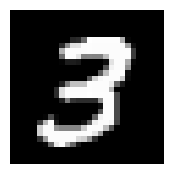

In [5]:
import matplotlib.pyplot as plt
import pickle

# if the below fails to open, then the data file is not in the current working directory (see above code block)
with open('mini-mnist-1000.pickle', 'rb') as f:
  data = pickle.load(f)

im3 = data['images'][300] # 100 images of each digit
plt.figure(figsize=(2, 2))  # Adjust size as needed
plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.show()

# Downscaling Images

MNIST images are originally 28x28. We will train our models not just on the original images, but also on downscaled images with the following sizes: 14x14, 7x7, 4x4, 2x2. The next code block shows one way to do downscaling. As you can tell from the output, we cannot expect our model's accuracy will be too high on lower resolution versions, although it's unclear how much better you can do than random chance, which should have a 10% accuracy.

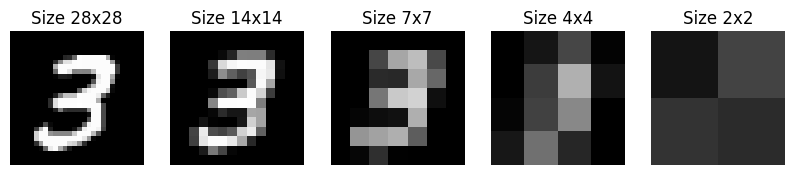

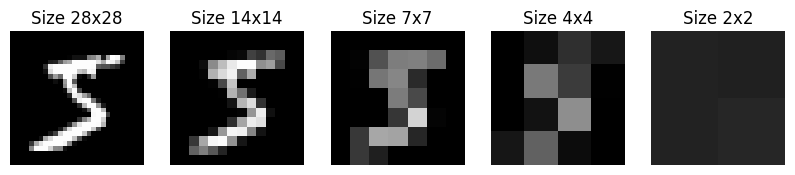

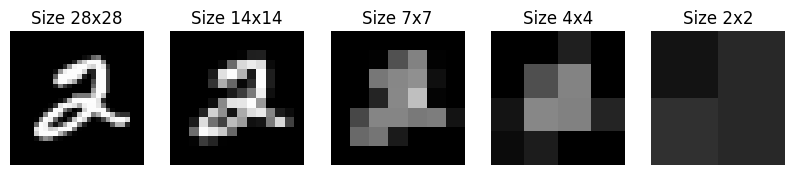

In [6]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt

# Function to downscale an image to different sizes
def downscale_image(image, downscaled_size):
    block_size = 28 // downscaled_size
    downscaled = np.zeros((downscaled_size, downscaled_size))
    for i in range(downscaled_size):
        for j in range(downscaled_size):
            # Calculate the average for each block
            block = image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            downscaled[i, j] = np.mean(block)
    return downscaled

# Load the dataset (assuming this file is in your working directory)
with open('mini-mnist-1000.pickle', 'rb') as f:
    data = pickle.load(f)

images = data['images']  # a list of 1000 numpy image matrices
labels = data['labels']  # a list of 1000 integer labels

# Select 3 "random" indices from the dataset
random_indices = [300, 500, 200]

# Downscale the images to multiple sizes and display them
sizes = [28, 14, 7, 4, 2]
for index in random_indices:
    fig, axs = plt.subplots(1, len(sizes), figsize=(10, 2))
    for ax, size in zip(axs, sizes):
        downscaled_image = downscale_image(images[index], size)
        ax.imshow(downscaled_image, cmap='gray', vmin=0, vmax=255)
        ax.set_title(f'Size {size}x{size}')
        ax.axis('off')
    plt.show()

In [ ]:
print(f'{type(data)}')
print(data['images'][200])

<class 'dict'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239

---
# Tasks

Your data contains 100 images in each class. When training models, use 80% of training, 10% for validation and 10% for testing. Make sure the data is balanced in each class when splitting.

---
## Task 1: Linear Classifier [20 points]

First, implement a linear classifier. The simplest way to do this is to adapt linear regression approaches that we learned about in class, where the output is a real number. For classification, we can let one category be an output of 1.0 and the other -1.0. Then, after the classifier is trained we can use the sign of the output to determine the predicted class.

However, since in MNIST there are multiple classes (10 digits, not just 2), we need to adapt the approach further. We will try both of the following two popular strategies: One-vs-Rest (OvR) and One-vs-One (OvO).

**One-vs-Rest (OvR)** is a strategy for using binary classification algorithms for multiclass problems. In this approach, a separate binary classifier is trained for each class, which predicts whether an instance belongs to that class or not, making it the 'one' against all other classes (the 'rest'). For a new input instance, compute the output of all classifiers. The predicted class is the one whose corresponding classifier gives the highest output value.

**One-vs-One (OvO)** is another strategy where a binary classifier is trained for every pair of classes. If there are N classes, you will train N(N−1)/2 classifiers. For a new input, evaluate it using all N(N−1)/2​ classifiers. Count the number of times each class is predicted over all binary classifications. The class with the highest count is selected as the final prediction.

### Report Results
Report the test accuracy for OvR and OvO, for each of the input image sizes, 28x28, 14x14, 7x7, 4x4, 2x2. A table may be helpful. Also report any interesting observations.

In [4]:
# we need to first split into training and test sets.

# Let's use the convention that the first 80 for each class is training, next 10 for each class is

training_data = []
training_labels = []
val_data=[]
val_labels=[]
test_data = []
test_labels=[]
for i in range(0,1000,100):
    for x in range(i,i+80):
        training_data.append(data['images'][x])
        training_labels.append(data['labels'][x])
    for x in range(i+80,i+90):
        val_data.append(data['images'][x])
        val_labels.append(data['labels'][x])
    for x in range(i+90,i+100):
        test_data.append(data['images'][x])
        test_labels.append(data['labels'][x])

#Downscale sizes

sizes = [28,14,7,4,2]

In [5]:
#Now lets define the linear regression function for one vs rest, which will return a vector of weights

def linearRegression(train_data, train_labels,num_steps = 100, learning_rate=0.0001):
    weights = np.ones(len(train_data[0]))

    #print(f'initialized weights as {weights}')
    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    #Gradient of Loss function = 2X_t (Xw-y)
    for _ in range(num_steps):
        left = train_data.T
        right = np.dot(train_data,weights)-train_labels
        grad = 2*np.dot(left,right)
        weights = weights - learning_rate*grad/train_data.size
    return weights

def predict(models, data):
    predictions = []
    for vector in data:
        curlabel = -1
        maxval = -10000
        for label in range(10):
            vector = np.array(vector)
            models[label] = np.array(models[label])
            pred = np.dot(vector,models[label])
            if pred>maxval:
                maxval = pred
                curlabel = label
        predictions.append(curlabel)
    return predictions


def accuracy(predictions,actual,istest='val'):
    correct = 0
    predictArray = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(predictions)):
        if predictions[i]==actual[i]:
            correct+=1
            predictArray[actual[i]]+=1
    if istest=='val':
        x = [0,1,2,3,4,5,6,7,8,9]
        y = predictArray
        plt.bar(x, y)
        plt.axis([-1,10,0,11])
        plt.xlabel("Digit Class")
        plt.ylabel("Number correctly classified")
        plt.title("Number of correctly classified digits per digit class in Validation set")
        plt.show()
    return correct/len(predictions)


28


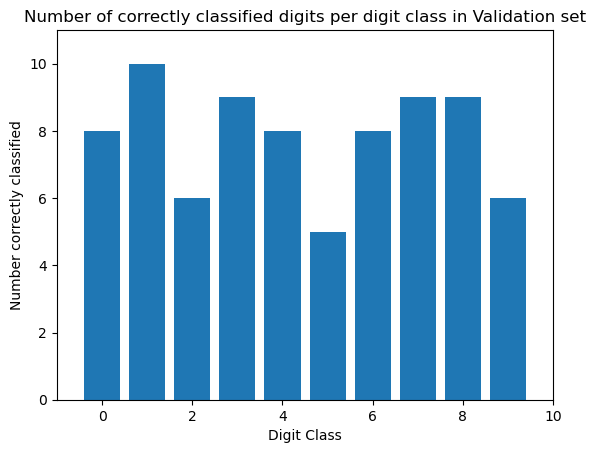

accuracy for validation set is 0.78
accuracy for test set is 0.78
14


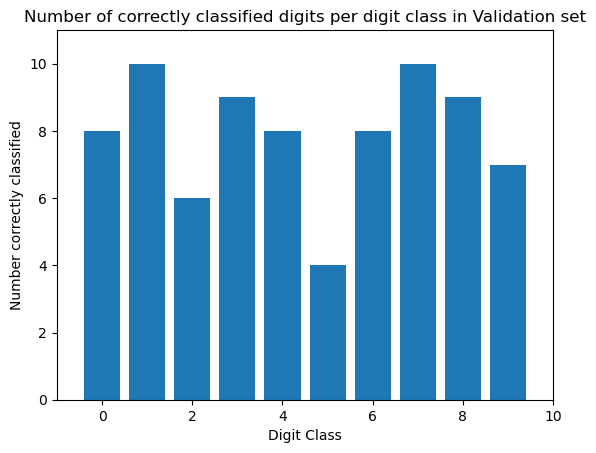

accuracy for validation set is 0.79
accuracy for test set is 0.78
7


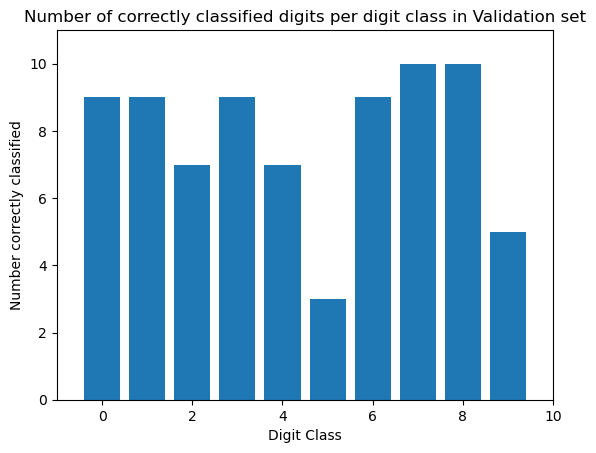

accuracy for validation set is 0.78
accuracy for test set is 0.73
4


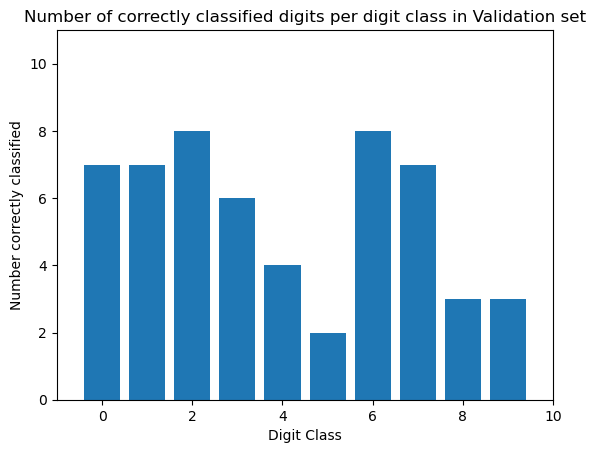

accuracy for validation set is 0.55
accuracy for test set is 0.6
2


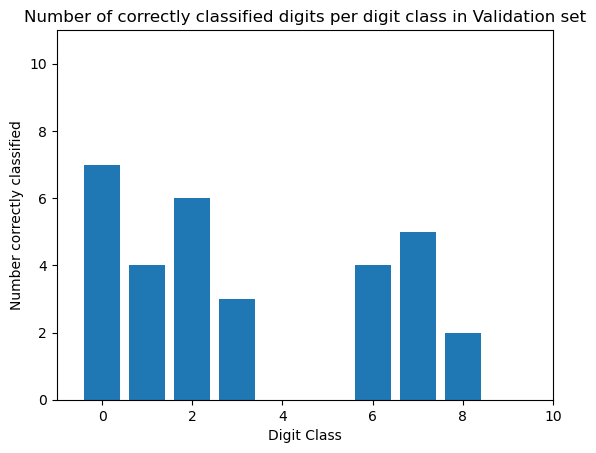

accuracy for validation set is 0.31
accuracy for test set is 0.27


In [ ]:
#Lets implment the One vs rest approach, where we train a model for each class,
#and each dataset is transformed to be 1 if it is the target, and -1 if not.

for size in sizes:
    print(size)
    sized_train_data = [downscale_image(row,size) for row in training_data]
    sized_val_data = [downscale_image(row,size) for row in val_data]
    sized_test_data = [downscale_image(row,size) for row in test_data]
    # Transform each entry from a size x size matrix to a 1 x size*size input vector for linear regression

    vectors = []
    val_vectors = []
    test_vectors = []

    models = []
    for vector in sized_train_data:
        # We add a one term as a dummy bias term
        vec = []
        for i in range(len(vector)):
            for j in range(len(vector[0])):
                vec.append(vector[i][j])
        vectors.append(vec)

    for vector in sized_val_data:
        # We add a one term as a dummy bias term
        vec = []
        for i in range(len(vector)):
            for j in range(len(vector[0])):
                vec.append(vector[i][j])
        val_vectors.append(vec)

    for vector in sized_test_data:
        # We add a one term as a dummy bias term
        vec = []
        for i in range(len(vector)):
            for j in range(len(vector[0])):
                vec.append(vector[i][j])
        test_vectors.append(vec)
    for label in range(0,10):
        #create new label classes:
        sized_train_labels = [1 if label==x else -1 for x in training_labels]
        weights = linearRegression(vectors,sized_train_labels)
        models.append(weights)

    val_predictions = predict(models,val_vectors)
    val_accuracy = accuracy(val_predictions,val_labels)
    print(f'accuracy for validation set is {val_accuracy}')

    test_predictions = predict(models,test_vectors)
    test_accuracy = accuracy(test_predictions, test_labels,'test')
    print(f'accuracy for test set is {test_accuracy}')




28


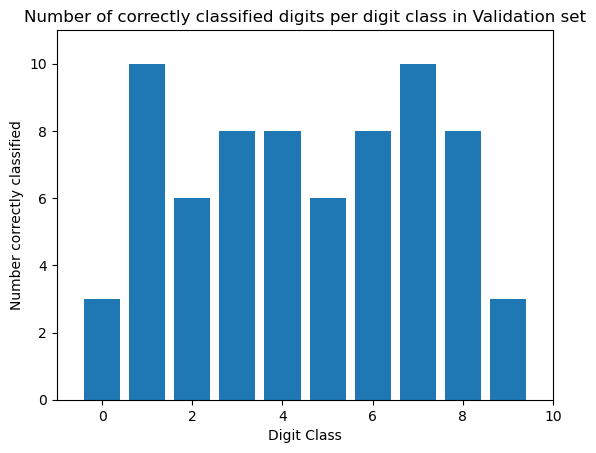

accuracy for validation set is 0.7
accuracy for test set is 0.68
14


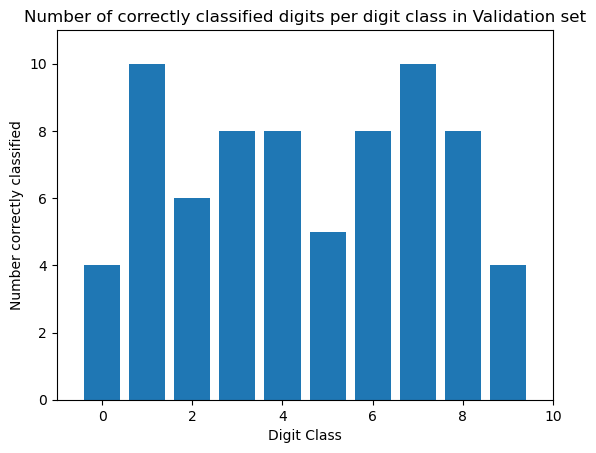

accuracy for validation set is 0.71
accuracy for test set is 0.67
7


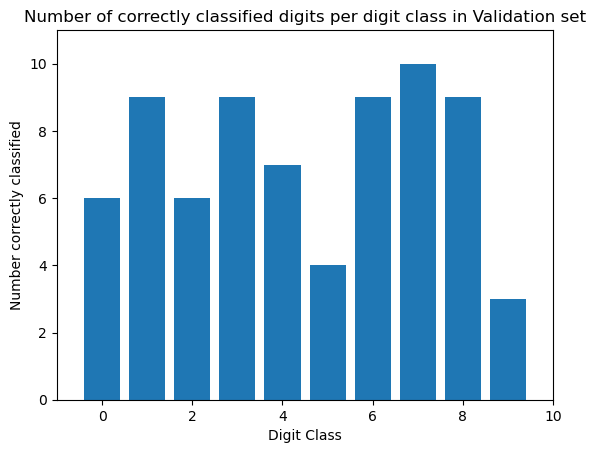

accuracy for validation set is 0.72
accuracy for test set is 0.66
4


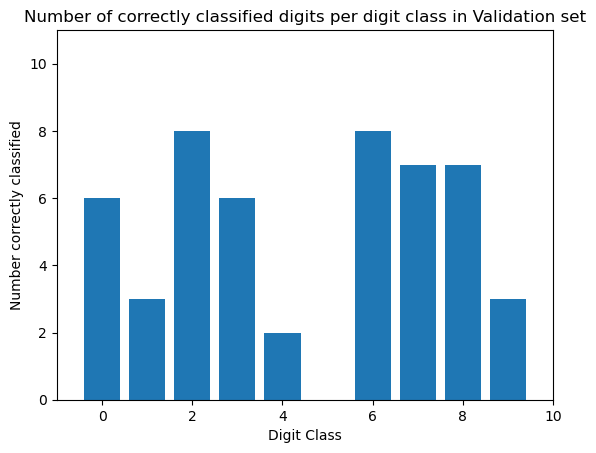

accuracy for validation set is 0.5
accuracy for test set is 0.5
2


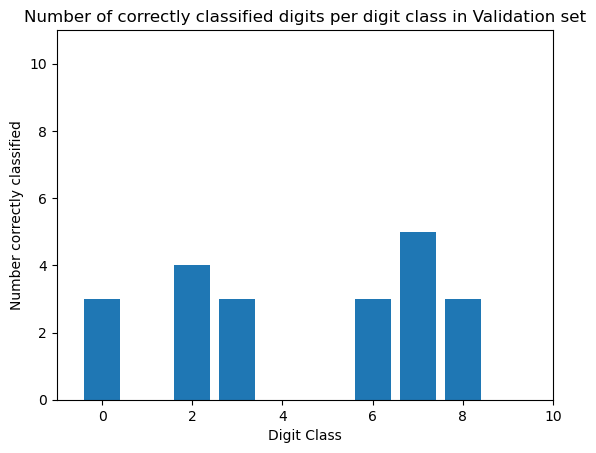

accuracy for validation set is 0.21
accuracy for test set is 0.18


In [ ]:
#Lets implment the One vs one approach, where we train a model for each pair of classes,
#and each dataset is transformed to be 1 if it is the first target
#-1 if it is the second target and 0 otherwise.
#

def predict_OvO(models, data):
    predictions = []
    for vector in data:
        curlabel = -1
        maxval = -10000
        label = 0
        for label_1 in range(10):
            for label_2 in range(label_1+1,10):
                pred = np.dot(vector,models[label])
                if abs(pred)>maxval:
                    maxval = abs(pred)
                    if pred>0:
                        curlabel = label_1
                    if pred<0:
                        curlabel = label_2
                label+=1
        predictions.append(curlabel)
    return predictions

for size in sizes:
    print(size)
    sized_train_data = [downscale_image(row,size) for row in training_data]
    sized_val_data = [downscale_image(row,size) for row in val_data]
    sized_test_data = [downscale_image(row,size) for row in test_data]
    # Transform each entry from a size x size matrix to a 1 x size*size input vector for linear regression

    vectors = []
    val_vectors = []
    test_vectors = []

    models = []
    for vector in sized_train_data:
        # We add a one term as a dummy bias term
        vec = []
        for i in range(len(vector)):
            for j in range(len(vector[0])):
                vec.append(vector[i][j])
        vectors.append(vec)

    for vector in sized_val_data:
        # We add a one term as a dummy bias term
        vec = []
        for i in range(len(vector)):
            for j in range(len(vector[0])):
                vec.append(vector[i][j])
        val_vectors.append(vec)

    for vector in sized_test_data:
        # We add a one term as a dummy bias term
        vec = []
        for i in range(len(vector)):
            for j in range(len(vector[0])):
                vec.append(vector[i][j])
        test_vectors.append(vec)
    for label_1 in range(10):
        for label_2 in range(label_1+1,10):
            #create new label classes:
            sized_train_labels = [1 if label_1==x else -1 if label_2==x else 0 for x in training_labels]
            weights = linearRegression(vectors,sized_train_labels)
            models.append(weights)

    val_predictions = predict_OvO(models,val_vectors)
    val_accuracy = accuracy(val_predictions,val_labels)

    test_predictions = predict_OvO(models,test_vectors)
    test_accuracy = accuracy(test_predictions, test_labels,'test')

    print(f'accuracy for validation set is {val_accuracy}')
    print(f'accuracy for test set is {test_accuracy}')


---
## Task 2: Data Augmentation [20 points]

Your boss was unhappy with the test accuracy, especially of your 2x2 image classifier, and has made some suggestions. The problem, according to your boss, is that there is not enough data in each input $x$. You are told to augment the data with derived features in order to help the classifier.

Specifically, given an input $x$, create additional attributes by computing all of the data up to powers of two. For example, in the 2x2 case your example $x$ consists of four pixel values $x_0$, $x_1$, $x_2$, and $x_3$. Your new input data would have:

* all power of zero: 1 (constant)
* all powers of one: $x_0$, $x_1$, $x_2$, $x_3$
* all powers of two:

  $x_0^2$, $x_0 x_1$, $x_0 x_2$, $x_0 x_3$,
  
  $x_1^2$, $x_1 x_2$, $ x_1 x_3$,
  
  $x_2^2$, $x_2 x_3$,
  
  $x_3^2$

The data would have 15 values, which has the potential to learn nonlinear relationships between the original inputs, which was not possible before.

### Report Results

Report the test accuracy for OvR only, with the data augmentation approach, for each of the input image sizes, 28x28, 14x14, 7x7, 4x4, 2x2 (again, perhaps incorporating a table). Report any interesting results or observations.

Also, explain to your boss what the danger is of looking at a model's final test accuracy and then suggesting changes to improve it. What should be done instead, if you know you will consider different types of models or hyperparameters in the same model class?

14


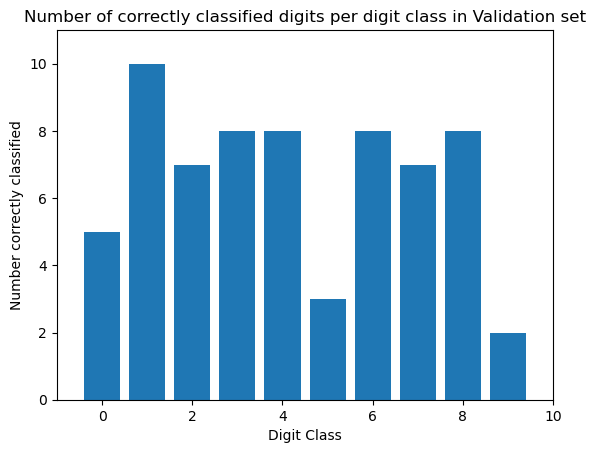

accuracy for validation set is 0.66
accuracy for test set is 0.6
7


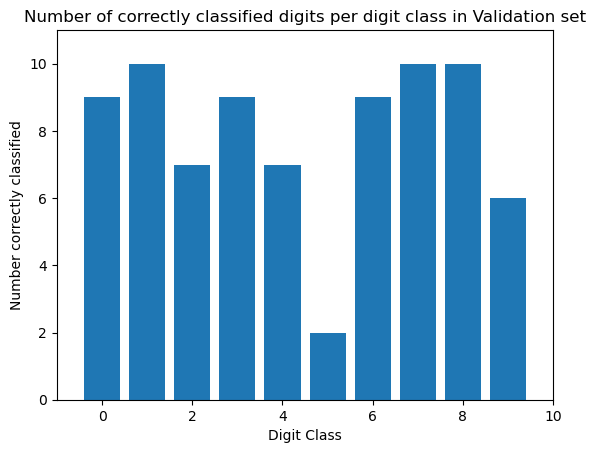

accuracy for validation set is 0.79
accuracy for test set is 0.79
4


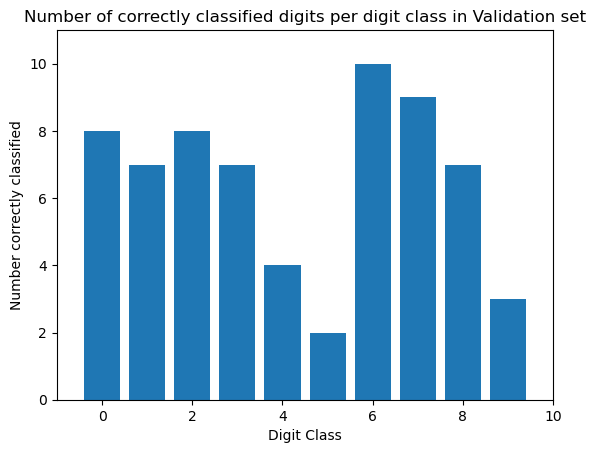

accuracy for validation set is 0.65
accuracy for test set is 0.65
2


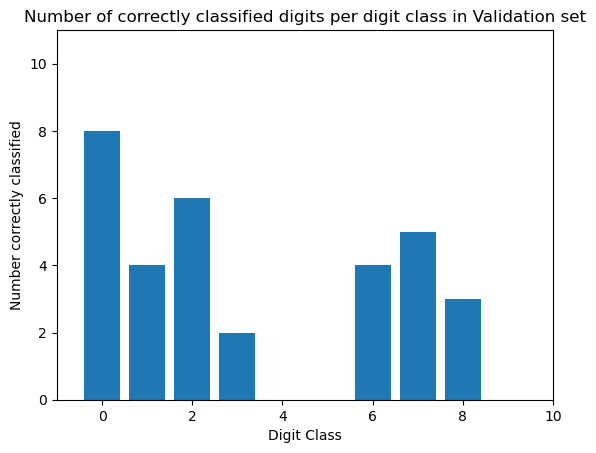

accuracy for validation set is 0.32
accuracy for test set is 0.29


In [ ]:
# Your answer goes here
#Lets implment the One vs rest approach, where we train a model for each class,
#and each dataset is transformed to be 1 if it is the target, and -1 if not.
def augment_image(data,size):
    newImages = []
    x=0
    for image in data:
        x+=1
        augmentImage = []
        flattenedImage = []
        y=0
        for row in image:
            for col in row:
                flattenedImage.append(col)
                augmentImage.append(col)
        for val1 in range(len(flattenedImage)):
            for val2 in range(val1,len(flattenedImage)):
                augmentImage.append(np.dot(augmentImage[val1],augmentImage[val2])**0.5)
        newImages.append(augmentImage)
    return newImages
for size in sizes[1:]:
    print(size)
    sized_train_data = [downscale_image(row,size) for row in training_data]
    augmented_train_data = augment_image(sized_train_data,size)
    sized_val_data = [downscale_image(row,size) for row in val_data]
    augmented_val_data = augment_image(sized_val_data,size)
    sized_test_data = [downscale_image(row,size) for row in test_data]
    augmented_test_data = augment_image(sized_test_data,size)
    # Transform each entry from a size x size matrix to a 1 x size*size input vector for linear regression

    vectors = []
    val_vectors = []
    test_vectors = []

    models = []
    for vector in augmented_train_data:
        # We add a one term as a dummy bias term
        vec = [1]
        for i in range(len(vector)):
            vec.append(vector[i])
        vectors.append(vec)

    for vector in augmented_val_data:
        # We add a one term as a dummy bias term
        vec = [1]
        for i in range(len(vector)):
            vec.append(vector[i])
        val_vectors.append(vec)

    for vector in augmented_test_data:
        # We add a one term as a dummy bias term
        vec = [1]
        for i in range(len(vector)):
            vec.append(vector[i])
        test_vectors.append(vec)
    for label in range(0,10):
        #create new label classes:
        augmented_train_labels = [1 if label==x else -1 for x in training_labels]
        weights = linearRegression(vectors,augmented_train_labels)
        models.append(weights)

    val_predictions = predict(models,val_vectors)
    val_accuracy = accuracy(val_predictions,val_labels)
    print(f'accuracy for validation set is {val_accuracy}')

    test_predictions = predict(models,test_vectors)
    test_accuracy = accuracy(test_predictions, test_labels,'test')
    print(f'accuracy for test set is {test_accuracy}')




Explanations for Boss:

You aren't supposed to know any information from the test when making the model,
this allows the model to see what should be unseen data and could cause overfitting.
Instead, you should only 'test' using the validation set when deciding the different types of models and deciding the hyperparameters.

---
## Task 3: k-Nearest Neighbors Classifier [20 points]

Your boss is still unhappy with the results (and still ignoring your advice about not using test data accuracy for model decisions).

Next, you are to use the k-nearest neighbors approach to build a classifier for our data. Since we have multiple classes, the one that gets selected can be based on a plurality vote of the $k$ closest samples (whichever category is most frequent). If there are ties, select the class based on the sum of the distances from the test point. For example, if $k=5$, and the closest 5 samples have two pictures that are from category "1" and two pictures that are from category "7", then you choose the output by computing the sum of the distance from the test point and the two "5" samples, as well as the sum of distances from the test point to the two "7" samples, and then outputting the class with the smaller total distance.

### Report Results

For each image size, exhaustively explore different values of $k$ up to 50. Report the best test accuracy. Report the average time taken to do a lookup with the model.

In [ ]:
#Define k-nearest neighbor method
#Takes in arguments train_data(data to use to classify), train_labels(the labels for the data),
#toClassify_data(the data to be classified) and k(the number of closest neighbors)
#Distance is sum of values in matrix after difference of training data and data to be classified
def kNN(train_data,train_label,toClassify_data,k):
    classified_data = []
    for image in toClassify_data:
        indexes = []
        differences = []
        for n in range(len(train_data)):
            differenceMatrix = image - train_data[n]
            difference = np.sum(abs(differenceMatrix))
            if len(indexes)<k:
                indexes.append(n)
                differences.append(difference)
            else:
                index = n
                for i in range(len(indexes)):
                    if differences[i]>difference:
                        diff=differences[i]
                        thisIndex=index
                        differences[i]=difference
                        indexes[i]=index
                        difference=diff
                        index=thisIndex
        #has arrays of differences and corresponding train_label index for a single image
        labelDict = {}
        for n in range(len(indexes)):#finds the labels of the closest k images
            label = train_label[indexes[n]]
            if label in labelDict:
                labelDict[label][0]+=1
                labelDict[label][1]+=differences[n]
            else:
                labelDict[label]=[1,differences[n]]
        #finds the most common labels
        bestLabels = 'x'
        for label in labelDict:
            if bestLabels == 'x':
                bestLabels = [[label,labelDict[label]]]
            #bestLabels[0]=[label,labelDict[label]]
            #bestLabels[0][1]=labelDict[label] = [numInstances,distance]
            elif labelDict[label][0]>bestLabels[0][1][0]:
                bestLabels = [[label,labelDict[label]]]
            elif labelDict[label][0]==bestLabels[0][1][0]:
                bestLabels.append([label,labelDict[label]])
        #pick the one with the smaller distance from the bestLabels
        theBestLabel = bestLabels[0]
        for label in bestLabels:
            if label[1]<theBestLabel[1]:
                theBestLabel = label
        classified_data.append(theBestLabel[0])
    return classified_data


In [ ]:
import time
# Your answer goes here
bestTestAccuracy = 0
bestTestAccuracy28 = 0
bestTestAccuracy14 = 0
bestTestAccuracy7 = 0
bestTestAccuracy4 = 0
bestTestAccuracy2 = 0
bestK = 0
bestK28 = 0
bestK14 = 0
bestK7 = 0
bestK4 = 0
bestK2 = 0
totalTime = 0
totalNum = 0
for k in range(1,51):
    print(f'k = {k}')
    for size in sizes:
        print(size)
        sized_train_data = [downscale_image(row,size) for row in training_data]
        sized_val_data = [downscale_image(row,size) for row in val_data]
        sized_test_data = [downscale_image(row,size) for row in test_data]
        # Transform each entry from a size x size matrix to a 1 x size*size input vector for linear regression

        train_vectors = []
        val_vectors = []
        test_vectors = []

        models = []
        for vector in sized_train_data:
            # We add a one term as a dummy bias term
            vec = []
            for i in range(len(vector)):
                for j in range(len(vector[0])):
                    vec.append(vector[i][j])
            train_vectors.append(vec)

        for vector in sized_val_data:
            # We add a one term as a dummy bias term
            vec = []
            for i in range(len(vector)):
                for j in range(len(vector[0])):
                    vec.append(vector[i][j])
            val_vectors.append(vec)

        for vector in sized_test_data:
            # We add a one term as a dummy bias term
            vec = []
            for i in range(len(vector)):
                for j in range(len(vector[0])):
                    vec.append(vector[i][j])
            test_vectors.append(vec)
        t0 = time.time()
        val_predictions = kNN(np.array(train_vectors),np.array(training_labels),np.array(val_vectors),k)
        t1 = time.time()
        totalTime += t1-t0
        totalNum += 1
        val_accuracy = accuracy(val_predictions,val_labels,'hide')
        print(f'accuracy for validation set is {val_accuracy}')

        t0 = time.time()
        test_predictions = kNN(np.array(train_vectors),np.array(training_labels),np.array(test_vectors),k)
        t1 = time.time()
        totalTime += t1-t0
        totalNum += 1
        test_accuracy = accuracy(test_predictions, test_labels,'test')
        if test_accuracy > bestTestAccuracy:
            bestTestAccuracy = test_accuracy
            bestK = k
        if size == 28 and test_accuracy > bestTestAccuracy28:
            bestTestAccuracy28 = test_accuracy
            bestK28 = k
        if size == 14 and test_accuracy > bestTestAccuracy14:
            bestTestAccuracy14 = test_accuracy
            bestK14 = k
        if size == 7 and test_accuracy > bestTestAccuracy7:
            bestTestAccuracy7 = test_accuracy
            bestK7 = k
        if size == 4 and test_accuracy > bestTestAccuracy4:
            bestTestAccuracy4 = test_accuracy
            bestK4 = k
        if size == 2 and test_accuracy > bestTestAccuracy2:
            bestTestAccuracy2 = test_accuracy
            bestK2 = k
        print(f'accuracy for test set is {test_accuracy}')
print(f'Average time taken for lookup: {totalTime/totalNum*1000} milliseconds')
print(f'Best Test Accuracy: {bestTestAccuracy}')
print(f'k value for best test accuracy: {bestK}')
print(f'Best Test Accuracy 28x28: {bestTestAccuracy28}')
print(f'k value for best test accuracy 28x28: {bestK28}')
print(f'Best Test Accuracy 14x14: {bestTestAccuracy14}')
print(f'k value for best test accuracy 14x14: {bestK14}')
print(f'Best Test Accuracy 7x7: {bestTestAccuracy7}')
print(f'k value for best test accuracy 7x7: {bestK7}')
print(f'Best Test Accuracy 4x4: {bestTestAccuracy4}')
print(f'k value for best test accuracy 4x4: {bestK4}')
print(f'Best Test Accuracy 2x2: {bestTestAccuracy2}')
print(f'k value for best test accuracy 2x2: {bestK2}')

k = 1
28
accuracy for validation set is 0.88
accuracy for test set is 0.81
14
accuracy for validation set is 0.87
accuracy for test set is 0.85
7
accuracy for validation set is 0.88
accuracy for test set is 0.78
4
accuracy for validation set is 0.67
accuracy for test set is 0.67
2
accuracy for validation set is 0.49
accuracy for test set is 0.32
k = 2
28
accuracy for validation set is 0.88
accuracy for test set is 0.81
14
accuracy for validation set is 0.87
accuracy for test set is 0.85
7
accuracy for validation set is 0.88
accuracy for test set is 0.78
4
accuracy for validation set is 0.67
accuracy for test set is 0.67
2
accuracy for validation set is 0.49
accuracy for test set is 0.32
k = 3
28
accuracy for validation set is 0.82
accuracy for test set is 0.79
14
accuracy for validation set is 0.83
accuracy for test set is 0.8
7
accuracy for validation set is 0.81
accuracy for test set is 0.74
4
accuracy for validation set is 0.59
accuracy for test set is 0.58
2
accuracy for validation

accuracy for validation set is 0.32
accuracy for test set is 0.36
2
accuracy for validation set is 0.27
accuracy for test set is 0.23
k = 25
28
accuracy for validation set is 0.5
accuracy for test set is 0.5
14
accuracy for validation set is 0.51
accuracy for test set is 0.53
7
accuracy for validation set is 0.53
accuracy for test set is 0.45
4
accuracy for validation set is 0.32
accuracy for test set is 0.36
2
accuracy for validation set is 0.27
accuracy for test set is 0.22
k = 26
28
accuracy for validation set is 0.49
accuracy for test set is 0.5
14
accuracy for validation set is 0.51
accuracy for test set is 0.53
7
accuracy for validation set is 0.52
accuracy for test set is 0.45
4
accuracy for validation set is 0.32
accuracy for test set is 0.37
2
accuracy for validation set is 0.27
accuracy for test set is 0.23
k = 27
28
accuracy for validation set is 0.48
accuracy for test set is 0.49
14
accuracy for validation set is 0.46
accuracy for test set is 0.49
7
accuracy for validation 

accuracy for validation set is 0.38
accuracy for test set is 0.35
7
accuracy for validation set is 0.36
accuracy for test set is 0.29
4
accuracy for validation set is 0.2
accuracy for test set is 0.27
2
accuracy for validation set is 0.23
accuracy for test set is 0.14
k = 49
28
accuracy for validation set is 0.38
accuracy for test set is 0.35
14
accuracy for validation set is 0.38
accuracy for test set is 0.35
7
accuracy for validation set is 0.36
accuracy for test set is 0.28
4
accuracy for validation set is 0.2
accuracy for test set is 0.27
2
accuracy for validation set is 0.22
accuracy for test set is 0.14
k = 50
28
accuracy for validation set is 0.38
accuracy for test set is 0.35
14
accuracy for validation set is 0.38
accuracy for test set is 0.35
7
accuracy for validation set is 0.36
accuracy for test set is 0.27
4
accuracy for validation set is 0.2
accuracy for test set is 0.27
2
accuracy for validation set is 0.22
accuracy for test set is 0.14
Average time taken for lookup: 501.

---
## Task 4: Neural Networks [40 Points]

Next, your boss wants you to try neural networks. Rather than using a library for everything, you will **only** use `pytorch` to perform backpropagation and compute gradients. You can write your own neural network class if desired, don't use anything from `pytorch` for that.


An example network and how to compute gradients with pytorch is shown below.


In [ ]:
# Example of using pytorch to compute gradients and updates weights and biases
#
# The network consists of:
# 1. An input layer with 3 features.
# 2. A first hidden layer with 3 neurons. Each neuron in this layer performs a linear transformation
#    on the input data using a weight matrix (W1) and a bias vector (b1). This is followed by a sigmoid
#    activation function.
# 3. A second hidden layer, also with 3 neurons, which processes the output of the first layer. Similar
#    to the first layer, it uses a weight matrix (W2) and a bias vector (b2) for linear transformation,
#    followed by a softmax activation function. The softmax activation is used here to normalize the
#    output of the second layer into a probability distribution over the three classes. This is particularly
#    useful for multi-class classification problems.
# 4. The network uses cross-entropy as the loss function, which is a common choice for classification tasks
#    involving softmax outputs. This loss function compares the predicted probability distribution with the
#    true distribution (one-hot encoded) and penalizes the predictions that diverge from the actual labels.
#


import torch

# Initialize input, weights, and biases
x = torch.tensor([1.0, 2.0, 3.0])
W1 = torch.tensor([[0.1, 0.2, 0.5],
                  [-0.1, -0.5, -1.1],
                  [0, 7.5, -1.1]], requires_grad=True)
b1 = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)

W2 = torch.tensor([[0.1, -0.3, 0.4],
                  [0.2, 0.4, -0.6],
                  [-0.1, 0.5, -0.2]], requires_grad=True)
b2 = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)

# Target output
y_true = torch.tensor([1.0, 0.0, 0.0])0

# Forward pass through first layer
z1 = torch.matmul(W1, x) + b1
a1 = torch.sigmoid(z1)  # Sigmoid activation

# Forward pass through second layer
z2 = torch.matmul(W2, a1) + b2
a2 = torch.softmax(z2, dim=0)  # Softmax activation

print("Initial Output:", a2)
print("Desired Output:", y_true)

# Compute loss (Cross-entropy): https://en.wikipedia.org/wiki/Cross-entropy
loss = -torch.sum(y_true * torch.log(a2))
print("Initial loss:", loss.item())

# Backpropagation
loss.backward()

# you can print out gradient for each element now
print("Gradient for weights matrix W1:", W1.grad)

# Update weights and biases based on gradient (should reduce loss)
learning_rate = 0.02

# the no_grad() environment is needed to indicate that the computation should not
# be part of the gradient computation
with torch.no_grad():
    W1 -= learning_rate * W1.grad
    b1 -= learning_rate * b1.grad
    W2 -= learning_rate * W2.grad
    b2 -= learning_rate * b2.grad

# After the update, clear the gradients (in case we want to compute them again later)
W1.grad.zero_()
b1.grad.zero_()
W2.grad.zero_()
b2.grad.zero_()

# Forward pass with updated weights and biases
z1 = torch.matmul(W1, x) + b1
a1 = torch.sigmoid(z1)  # Sigmoid activation
z2 = torch.matmul(W2, a1) + b2
a2 = torch.softmax(z2, dim=0)  # Softmax activation

# Compute new loss
new_loss = -torch.sum(y_true * torch.log(a2))
print("New loss after updating weights and biases:", new_loss.item())


Initial Output: tensor([0.5348, 0.2167, 0.2485], grad_fn=<SoftmaxBackward0>)
Desired Output: tensor([1., 0., 0.])
Initial loss: 0.625852644443512
Gradient for weights matrix W1: tensor([[-2.9431e-03, -5.8862e-03, -8.8293e-03],
        [ 4.1993e-03,  8.3986e-03,  1.2598e-02],
        [-3.0524e-06, -6.1048e-06, -9.1572e-06]])
New loss after updating weights and biases: 0.6079817414283752


The code above updates the parameters based on a single piece of data, but often multiple inputs are used and their gradient is averaged when updating a model.

Your task is to write the training code for the different neural network architectures proposed and report accuracy. Start with all random parameters between -1 and 1. Training should stop when the accuracy, as measured on the validation data, no longer appears to be improving. You can plot the validation data accuracy over time to ensure this looks correct. If this takes too long but it appears the model is still improving in accuracy, consider increasing the learning rate (start with 0.02 as in the example).

For the gradient, you are to compute the gradient over the full set of training data, and then average them together before you update. Then, repeat with mini-batches of size 100, with 10 random samples from each class. This should update the model weights faster, but may require more updates to get the accuracy down.

### Report Results

Provide at least one plot of your validation data accuracy going down over time as training progresses. What was the condition you decided to use to detect if training should stop? How many updates were needed in the case of your plot?


Create a table where each row corresponds to one model and training method (mini-batch or full). Use the 7x7 version of the data (49-dimensional inputs). You are to explore the following models: the number of hidden layers can be varied between 2 and 4. Each layer's size can be 16, 32, or 64 neurons (all hidden layers have the same number of neurons). Explore three different activation functions for the network, ReLU (`torch.relu`), arctan (`torch.atan`), and sigmoid (`torch.sigmoid`). After the final layer, use a softmax rather than the normal network activation function, to ensure all outputs are between 0 and 1. There should be 10 outputs, one for each class in the MNIST data.

In the table, report the architecture, training time, number of model updates and test accuracy. What is the best architecture? Did mini-batches help with anything? Report any other interesting observations.



Batch Size: 800

Training with architecture: [49, 16, 16, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.10999999940395355
Number of model updates: 22
Time taken: 77.8200626373291 milliseconds


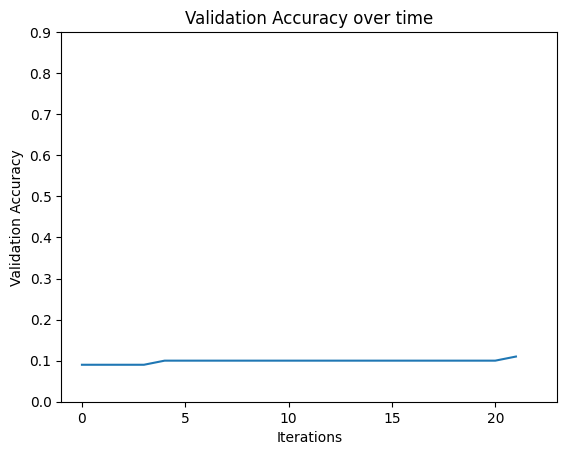


Training with architecture: [49, 16, 16, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.25999999046325684
Number of model updates: 22
Time taken: 94.57755088806152 milliseconds


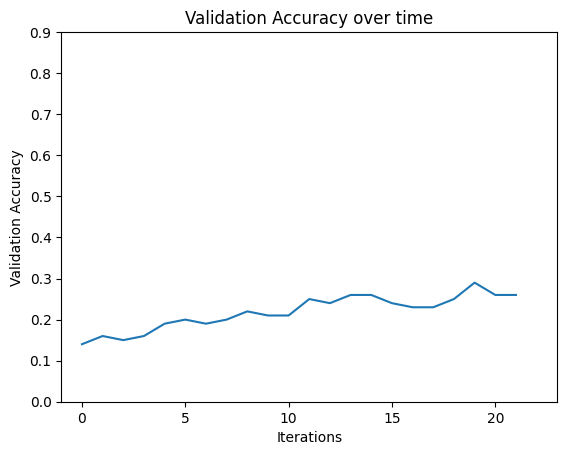


Training with architecture: [49, 16, 16, 10] and activation function: relu
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.10000000149011612
Number of model updates: 22
Time taken: 83.2521915435791 milliseconds


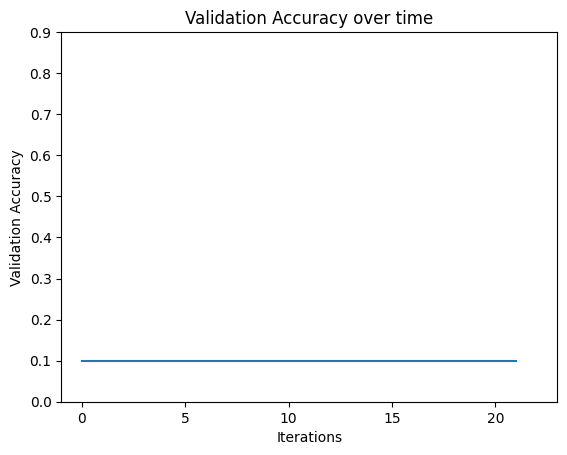


Training with architecture: [49, 32, 32, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.18000000715255737
Number of model updates: 22
Time taken: 65.64164161682129 milliseconds


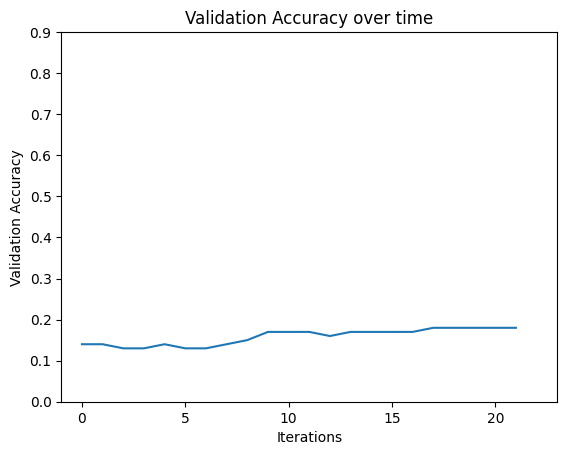


Training with architecture: [49, 32, 32, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.3100000023841858
Number of model updates: 24
Time taken: 72.61109352111816 milliseconds


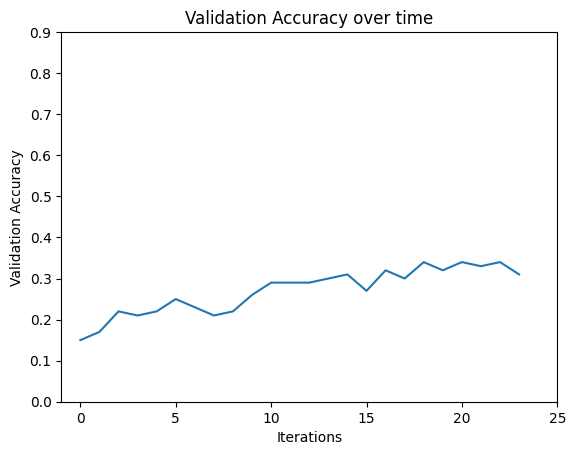


Training with architecture: [49, 32, 32, 10] and activation function: relu
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.10000000149011612
Number of model updates: 22
Time taken: 56.27942085266113 milliseconds


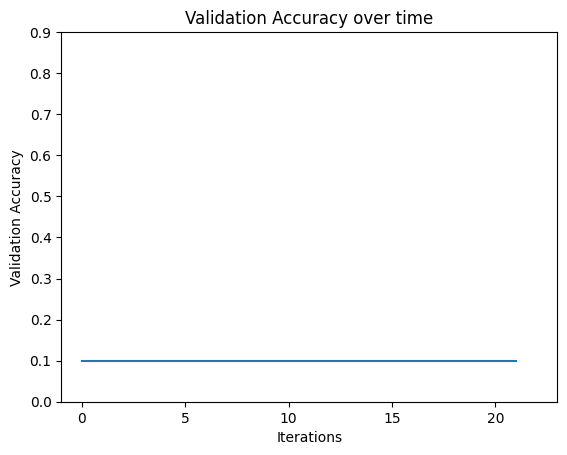


Training with architecture: [49, 64, 64, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.09000000357627869
Number of model updates: 22
Time taken: 106.42504692077637 milliseconds


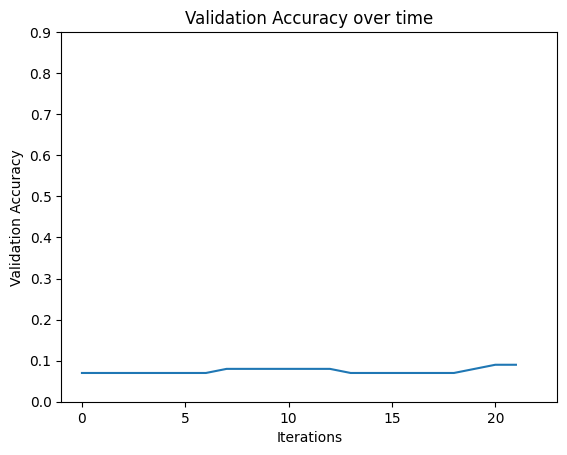


Training with architecture: [49, 64, 64, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.3199999928474426
Number of model updates: 33
Time taken: 82.72027969360352 milliseconds


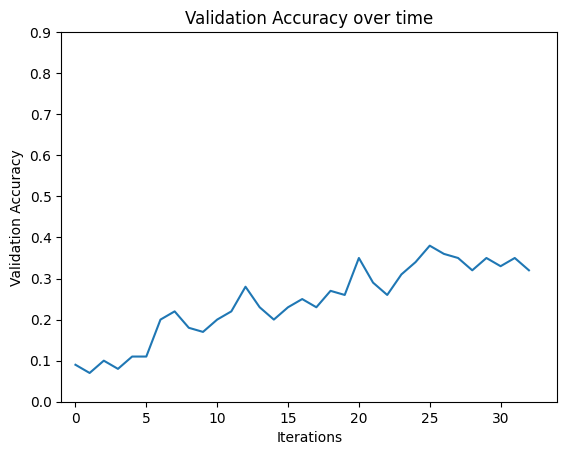


Training with architecture: [49, 32, 32, 32, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.03999999910593033
Number of model updates: 22
Time taken: 54.23927307128906 milliseconds


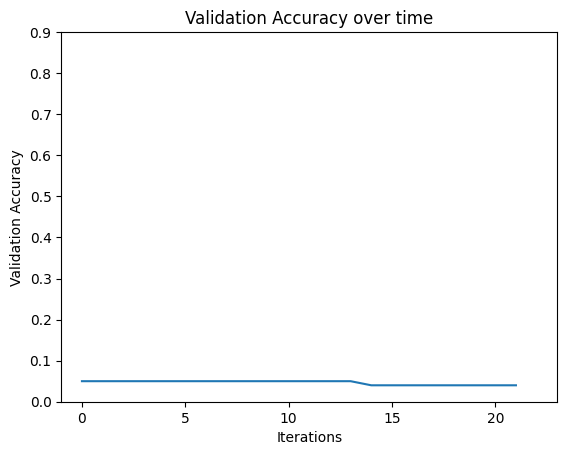


Training with architecture: [49, 32, 32, 32, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.30000001192092896
Number of model updates: 32
Time taken: 67.49248504638672 milliseconds


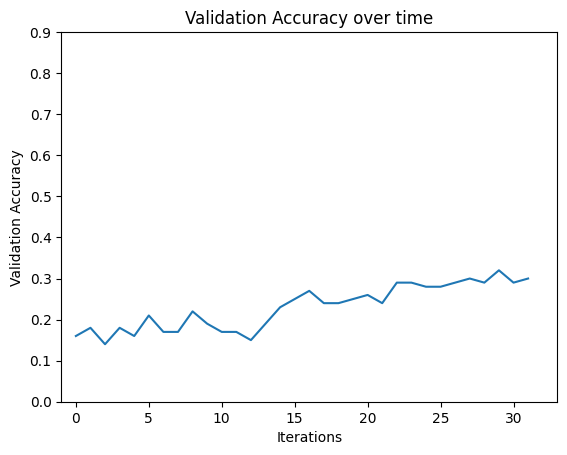


Training with architecture: [49, 64, 64, 64, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.12999999523162842
Number of model updates: 22
Time taken: 87.56709098815918 milliseconds


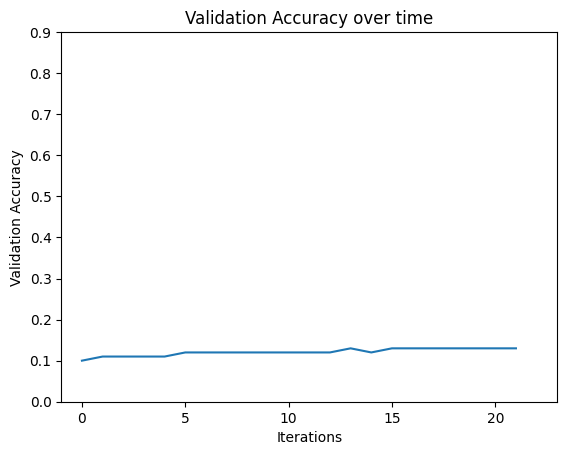


Training with architecture: [49, 64, 64, 64, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.18000000715255737
Number of model updates: 26
Time taken: 77.65746116638184 milliseconds


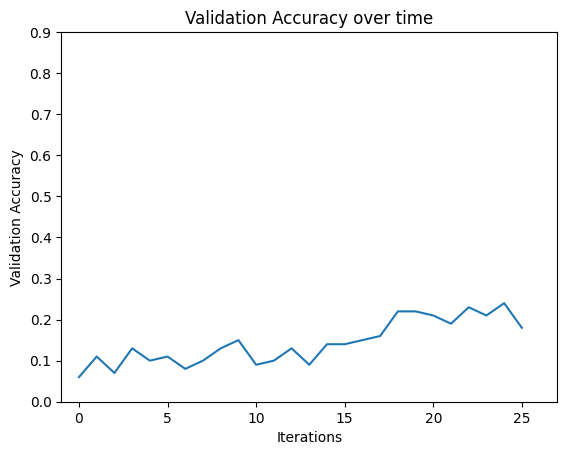


Training with architecture: [49, 64, 64, 64, 64, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.15000000596046448
Number of model updates: 22
Time taken: 105.08084297180176 milliseconds


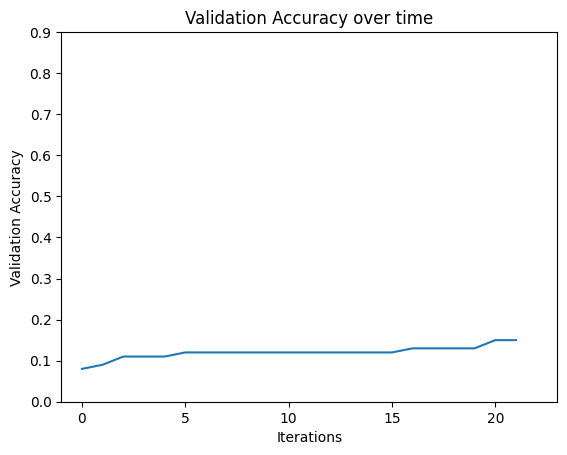


Training with architecture: [49, 64, 64, 64, 64, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.28999999165534973
Number of model updates: 33
Time taken: 121.05989456176758 milliseconds


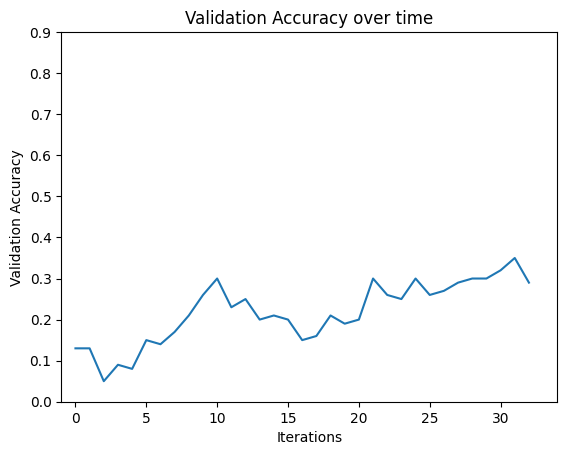

Batch Size: 100

Training with architecture: [49, 16, 16, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.41999998688697815
Number of model updates: 77
Time taken: 376.370906829834 milliseconds


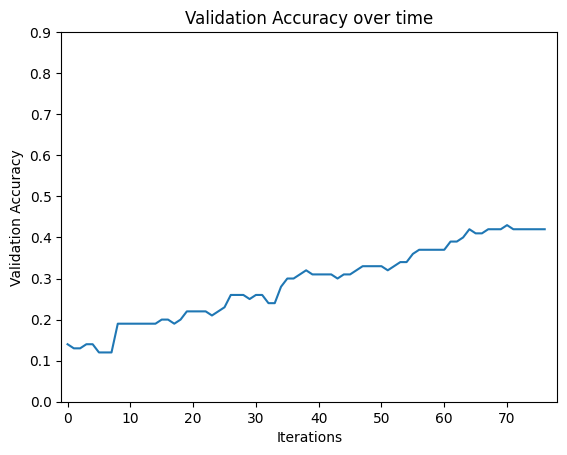


Training with architecture: [49, 16, 16, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.44999998807907104
Number of model updates: 22
Time taken: 117.72584915161133 milliseconds


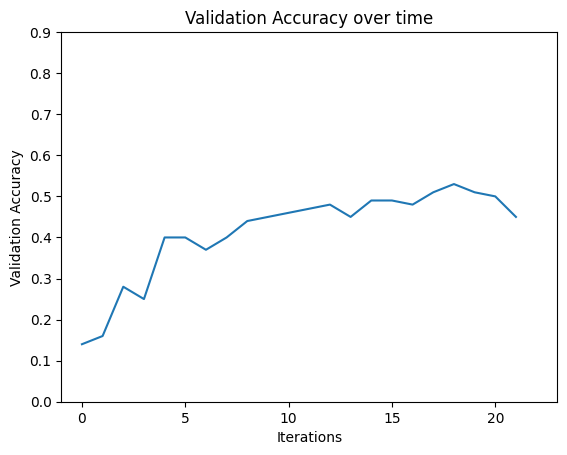


Training with architecture: [49, 16, 16, 10] and activation function: relu
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.10000000149011612
Number of model updates: 22
Time taken: 109.11417007446289 milliseconds


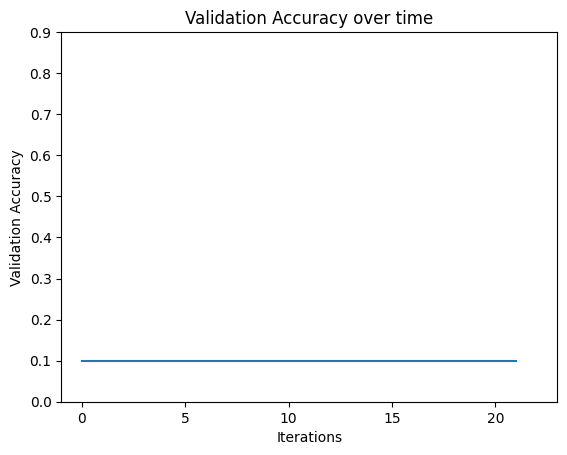


Training with architecture: [49, 32, 32, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.6100000143051147
Number of model updates: 65
Time taken: 375.3490447998047 milliseconds


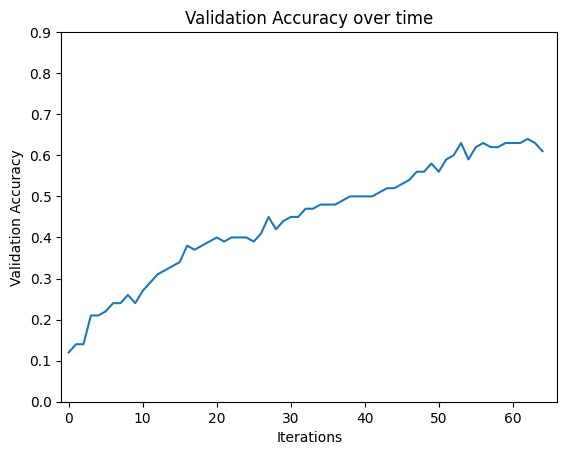


Training with architecture: [49, 32, 32, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.5299999713897705
Number of model updates: 51
Time taken: 283.59079360961914 milliseconds


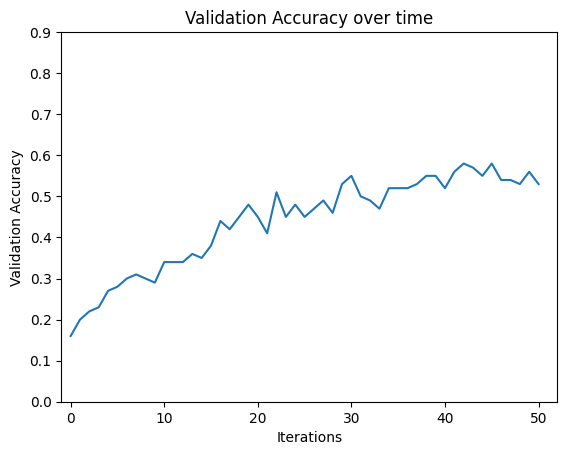


Training with architecture: [49, 32, 32, 10] and activation function: relu
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.10000000149011612
Number of model updates: 22
Time taken: 133.94737243652344 milliseconds


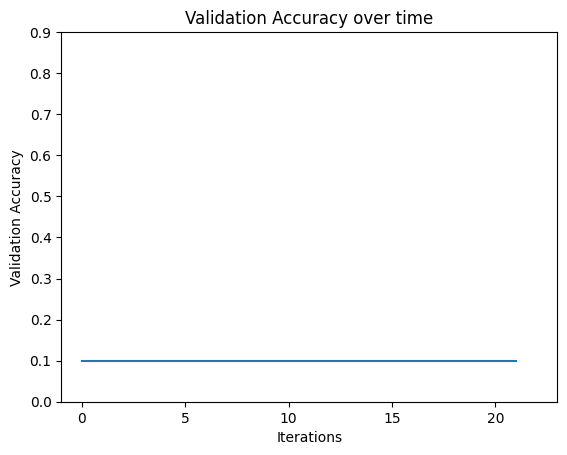


Training with architecture: [49, 64, 64, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.5299999713897705
Number of model updates: 73
Time taken: 497.6818561553955 milliseconds


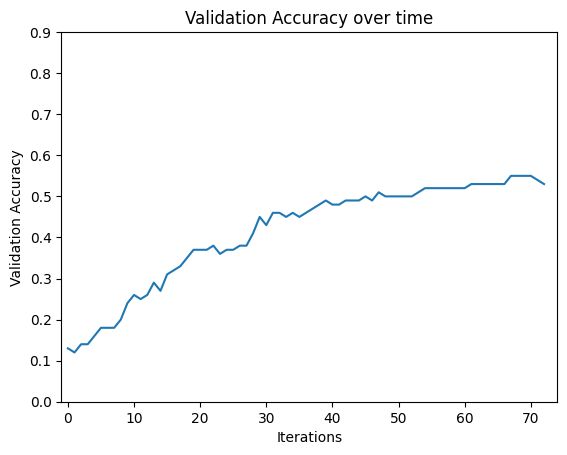


Training with architecture: [49, 64, 64, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.5199999809265137
Number of model updates: 24
Time taken: 145.98798751831055 milliseconds


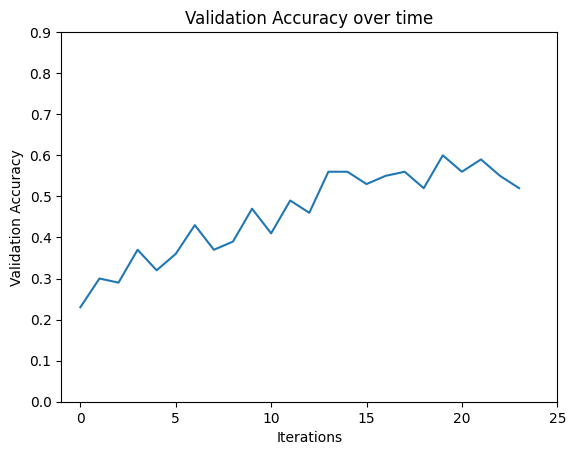


Training with architecture: [49, 32, 32, 32, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.5400000214576721
Number of model updates: 92
Time taken: 587.181806564331 milliseconds


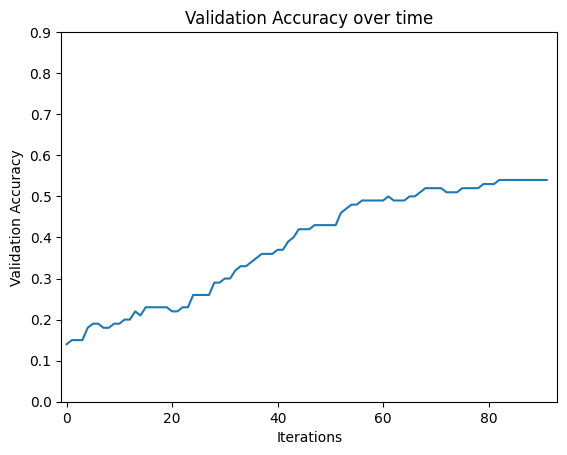


Training with architecture: [49, 32, 32, 32, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.47999998927116394
Number of model updates: 39
Time taken: 248.15726280212402 milliseconds


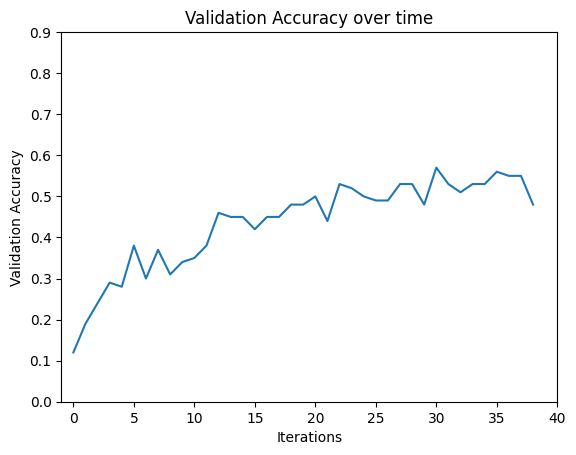


Training with architecture: [49, 64, 64, 64, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.6200000047683716
Number of model updates: 62
Time taken: 499.7820854187012 milliseconds


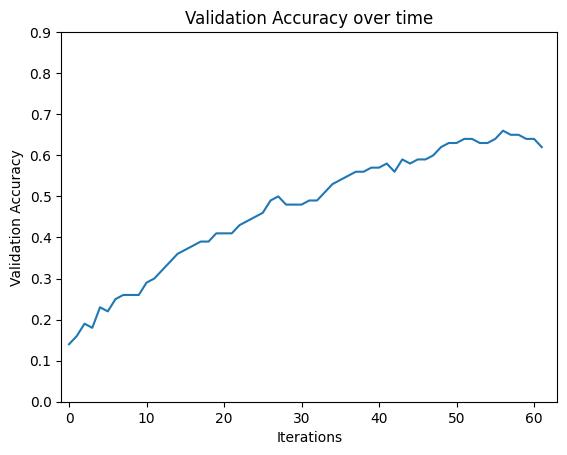


Training with architecture: [49, 64, 64, 64, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.5799999833106995
Number of model updates: 38
Time taken: 280.2913188934326 milliseconds


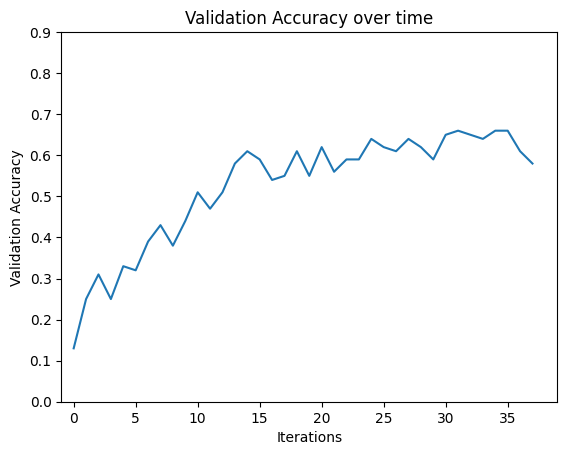


Training with architecture: [49, 64, 64, 64, 64, 10] and activation function: sigmoid
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.5600000023841858
Number of model updates: 114
Time taken: 1135.875940322876 milliseconds


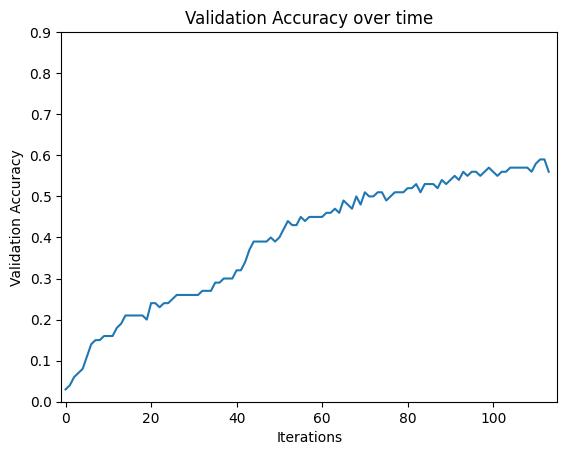


Training with architecture: [49, 64, 64, 64, 64, 10] and activation function: atan
Validation accuracy hasn't improved for 20 iterations. Stopping training.
Final Validation accuracy: 0.4300000071525574
Number of model updates: 37
Time taken: 445.16801834106445 milliseconds


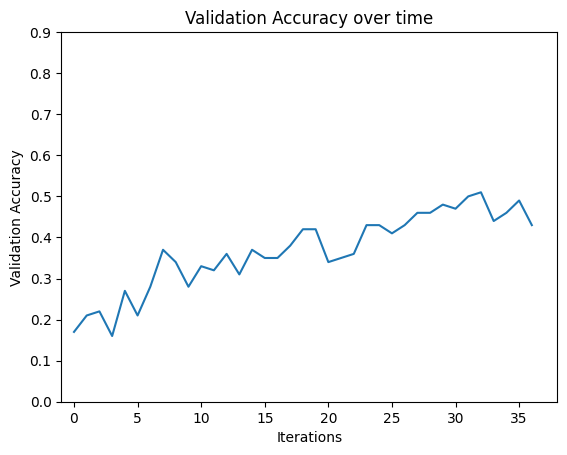

Max Validation Accuracy: 0.6200000047683716
Has layer sizes: [49, 64, 64, 64, 10], with activation function: sigmoid
and Batch size: 100


In [149]:
import torch
import random
import time

training_data = []
training_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []


for i in range(0, 1000, 100):
    for x in range(i, i + 80):
        training_data.append(torch.tensor(downscale_image(data['images'][x], 7)).view(-1))
        training_labels.append(data['labels'][x])
    for x in range(i + 80, i + 90):
        validation_data.append(torch.tensor(downscale_image(data['images'][x], 7)).view(-1))
        validation_labels.append(data['labels'][x])
    for x in range(i + 90, i + 100):
        test_data.append(torch.tensor(downscale_image(data['images'][x], 7)).view(-1))
        test_labels.append(data['labels'][x])

train_data = torch.stack(training_data)
train_labels = torch.tensor(training_labels)
val_data = torch.stack(validation_data)
val_labels = torch.tensor(validation_labels)


class NeuralNetwork:
    def __init__(self, layer_sizes, activation_function=torch.sigmoid):
        self.layer_sizes = layer_sizes
        self.activation_function = activation_function
        self.weights = self.initialize_weights()

    def initialize_weights(self):
        weights = []
        for i in range(1,len(self.layer_sizes)):
            weight = torch.tensor(
                [[random.uniform(-1, 1) for _ in range(self.layer_sizes[i - 1])]
                 for _ in range(self.layer_sizes[i])], requires_grad=True, dtype=torch.float32)  # Specify dtype=float32
            weights.append(weight)
        return weights
    def plot(self,x,y):
        plt.plot(x,y)
        plt.axis([-1,len(x)+1,0,.9])
        plt.xlabel("Iterations")
        plt.ylabel("Validation Accuracy")
        plt.title("Validation Accuracy over time")
        plt.show()
    def forward(self, x):
        output = x.float()  # Cast input data to float32
        for weight in self.weights[:-1]:
            output = torch.matmul(output, weight.t())
            output = self.activation_function(output)  # No need to cast weight matrix
        output = torch.matmul(output, self.weights[-1].t())
        output = torch.softmax(output, dim=0)
        return output

    def train(self, train_data, train_labels, val_data, val_labels, num_iterations=1000, learning_rate=0.05, batch_size=800):
        t0 = time.time()
        val_accuracies = []
        x=0
        indices = torch.randperm(train_data.size(0))
        train_data_shuffled = train_data[indices]
        train_labels_shuffled = train_labels[indices]
        for iteration in range(num_iterations):


            # mini-batch training
            for i in range(0, len(train_data), batch_size):
                batch_data = train_data_shuffled[i:i + batch_size]
                batch_labels = train_labels_shuffled[i:i + batch_size]

                output = self.forward(batch_data)

                loss = -torch.sum(torch.log(output[range(batch_size), batch_labels])) / batch_size
                #output_labels = []
                #for label in batch_labels:
                #    labelVector = np.zeros(10)
                #    labelVector[label] = 1
                #    output_labels.append(labelVector)
                #output_labels = torch.tensor(np.array(output_labels))
                #loss = -torch.sum(output_labels * torch.log(output)) /batch_size
                #loss.backward()
                gradients = torch.autograd.grad(loss, self.weights, retain_graph=True)

                # gradient descent
                with torch.no_grad():
                    #for weight in self.weights:
                    #    weight -= learning_rate * weight.grad
                    for weight, grad in zip(self.weights, gradients):
                        weight -= learning_rate * grad

            val_output = self.forward(val_data)
            val_predictions = torch.argmax(val_output, dim=1)
            val_accuracy = (val_predictions == val_labels).float().mean().item()
            val_accuracies.append(val_accuracy)
            if iteration > num_iterations/50:
                hasImproved = False
                for va in val_accuracies[-10:]:
                    if (val_accuracy-va)>=learning_rate/(1000/batch_size):
                        hasImproved = True
                if not hasImproved:
                    t1 = time.time()
                    print(f"Validation accuracy hasn't improved for {int(num_iterations/50)} iterations. Stopping training.")
                    print(f"Final Validation accuracy: {val_accuracy}")
                    print(f"Number of model updates: {iteration+1}")
                    print(f"Time taken: {(t1-t0)*1000} milliseconds")
                    self.plot(range(iteration+1),val_accuracies)
                    return val_accuracy
            if iteration >= num_iterations:
                self.plot(range(iteration),val_accuracies)
                return val_accuracy


architectures = [
    {"layer_sizes": [49, 16, 16, 10], "activation_function": torch.sigmoid, "afname": 'sigmoid'},
    {"layer_sizes": [49, 16, 16, 10], "activation_function": torch.atan, "afname": 'atan'},
    {"layer_sizes": [49, 16, 16, 10], "activation_function": torch.relu, "afname": 'relu'},
    {"layer_sizes": [49, 32, 32, 10], "activation_function": torch.sigmoid, "afname": 'sigmoid'},
    {"layer_sizes": [49, 32, 32, 10], "activation_function": torch.atan, "afname": 'atan'},
    {"layer_sizes": [49, 32, 32, 10], "activation_function": torch.relu, "afname": 'relu'},
    {"layer_sizes": [49, 64, 64, 10], "activation_function": torch.sigmoid, "afname": 'sigmoid'},
    {"layer_sizes": [49, 64, 64, 10], "activation_function": torch.atan, "afname": 'atan'},
    {"layer_sizes": [49, 32, 32, 32, 10], "activation_function": torch.sigmoid, "afname": 'sigmoid'},
    {"layer_sizes": [49, 32, 32, 32, 10], "activation_function": torch.atan, "afname": 'atan'},
    {"layer_sizes": [49, 64, 64, 64, 10], "activation_function": torch.sigmoid, "afname": 'sigmoid'},
    {"layer_sizes": [49, 64, 64, 64, 10], "activation_function": torch.atan, "afname": 'atan'},
    {"layer_sizes": [49, 64, 64, 64, 64, 10], "activation_function": torch.sigmoid, "afname": 'sigmoid'},
    {"layer_sizes": [49, 64, 64, 64, 64, 10], "activation_function": torch.atan, "afname": 'atan'},
]
batch_sizes = [800,100]
max_accuracy = 0
best_sizes = [49,16,16,10]
best_af = 'relu'
best_batch = 800
#print(f"\nTraining with architecture: {architectures[2]['layer_sizes']} and activation function: {architectures[2]['afname']}")
#model = NeuralNetwork(architectures[2]["layer_sizes"], architectures[2]["activation_function"])  # Initialize model
#accuracy = model.train(train_data, train_labels, val_data, val_labels,batch_size=100)  # Train model
for batch_size in batch_sizes:
    print(f"Batch Size: {batch_size}")
    for architecture in architectures:
        print(f"\nTraining with architecture: {architecture['layer_sizes']} and activation function: {architecture['afname']}")
        model = NeuralNetwork(architecture["layer_sizes"], architecture["activation_function"])  # Initialize model
        accuracy = model.train(train_data, train_labels, val_data, val_labels,batch_size=batch_size)  # Train model
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_sizes = architecture['layer_sizes']
            best_af = architecture['afname']
            best_batch = batch_size

print(f"Max Validation Accuracy: {max_accuracy}")
print(f"Has layer sizes: {best_sizes}, with activation function: {best_af}")
print(f"and Batch size: {best_batch}")

The best architecture for this neural network was 3 hidden layers, with a sigmoid acitivation function, and batch size 100. Adding too many hidden layers may be causing overfitting showing as reduced accuracy. Increasing the number of neurons indicates that it results in better accuracy. The relu activation function causes a vanishing gradient so we can not train it. At low neuron number and low hidden layer number, the neural network could not predict much better than random no matter the activation function. When using the full data set, the accuracy was lower. This may be due to overfitting.
